# Tarea 13

Fecha de entrega: 4/Octubre/2017

Por _Diana López Angeles_

In [1]:
using PyPlot

In [2]:
#Hacemos copy-paste de nuestra tarea 12

function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end;

function runge_kutta_dimensiones(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end;

#Nos sera util en el ejercicio 3:
function runge_kutta_4(f,x0,t0,tf,h)
    n=round((tf-t0)/h)+1               
    listt=linspace(t0,tf,n) 
    listx=zeros(n)  
    listx[1] = x0 
    for i in 1:length(listx)-1
        k1 = f(listx[i], listt[i])
        k2 = f(listx[i] + h*(k1)/2, listt[i+1])
        k3 = f(listx[i] + h*(k2)/2, listt[i+1])
        k4 = f(listx[i] + h*(k3), listt[i],)
        listx[i+1] = listx[i] + h/6*(k1 + 2*(k2) + 2*(k3) + k4)
    end
    return listt,listx
end;

__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [3]:
#La función que queremos resolver.
f(x,t)=[x[2], -1.0*x[1]-x[2]]

#Ponemos el intervalo donde queremos que lo grafique, [0,10]
list=0:0.01:10;

#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=1 y u(0)=0
soluciones_condiciones_iniciales=euler(f,list,[1,0]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1=map(x->x[1],soluciones_condiciones_iniciales);
listx2=map(x->x[2],soluciones_condiciones_iniciales);

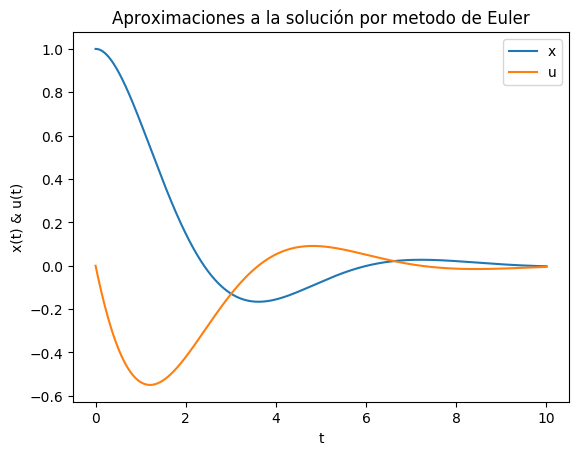

In [4]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución por metodo de Euler")
plot(list,listx1, label="x");
plot(list,listx2, label="u");
legend();

In [5]:
#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=1 y u(0)=0
soluciones_condiciones_iniciales=runge_kutta_dimensiones(f,list,[1,0]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales);
listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales);

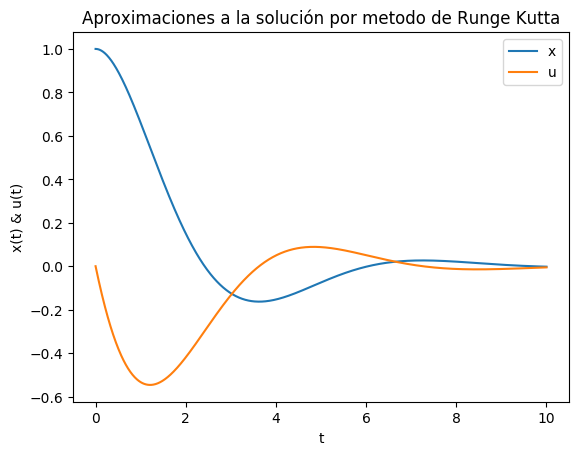

In [6]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución por metodo de Runge Kutta")
plot(list,listx1_kutta, label="x");
plot(list,listx2_kutta, label="u");
legend();

In [7]:
#Esta parte es más que nada tediosa porque son puros copy-paste de lo que ya hemos hecho x.x
#Ponemos el intervalo donde queremos que lo grafique, [0,100]
lista=0:0.01:10;

#Necesitamos hacer una lista para guardar las soluciones con condiciones iniciales x(0)=1 y u(0)=0
soluciones_condiciones_iniciales_euler=euler(f,lista,[1,0]);
soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(f,lista,[1,0]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1_euler=map(x->x[1],soluciones_condiciones_iniciales_euler);
listx2_euler=map(x->x[2],soluciones_condiciones_iniciales_euler);
listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);

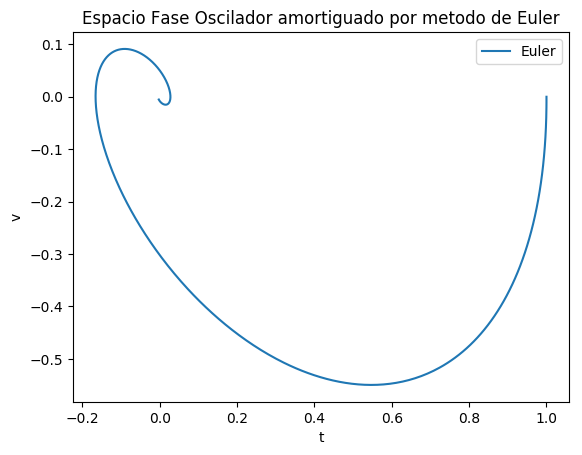

In [8]:
#finalmente graficamos:
xlabel("t")
ylabel("v")
title("Espacio Fase Oscilador amortiguado por metodo de Euler")
plot(listx1_euler,listx2_euler, label="Euler");
legend();

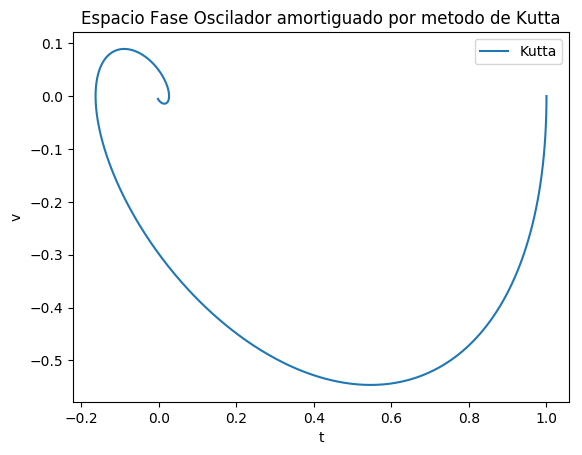

In [9]:
#finalmente graficamos:
xlabel("t")
ylabel("v")
title("Espacio Fase Oscilador amortiguado por metodo de Kutta")
plot(listx1_kutta,listx2_kutta, label="Kutta");
legend();

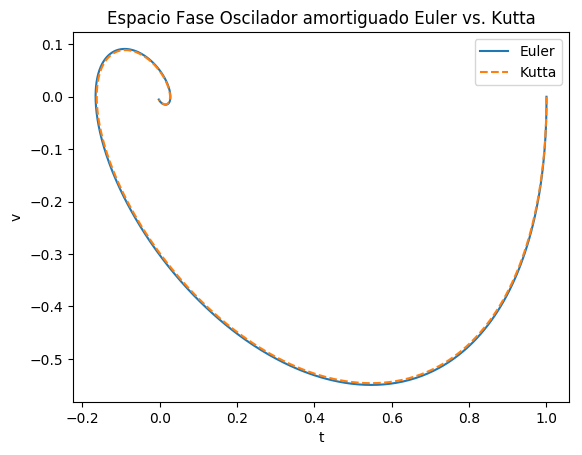

In [10]:
#finalmente graficamos:
xlabel("t")
ylabel("v")
title("Espacio Fase Oscilador amortiguado Euler vs. Kutta")
plot(listx1_euler,listx2_euler, label="Euler");
plot(listx1_kutta,listx2_kutta, label="Kutta", "--");
legend();

-----

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [11]:
#La función que queremos resolver.
w(x,t)=[x[2],-sin.(x[1])]

#Ponemos el intervalo donde queremos que lo grafique, [0,10]
list=0:0.01:10;

#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=1 y u(0)=0
soluciones_condiciones_iniciales=runge_kutta_dimensiones(w,list,[1,0]);

#Guardamos las soluciones en lists y la solución teórica tambien
wlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales);
wlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales);

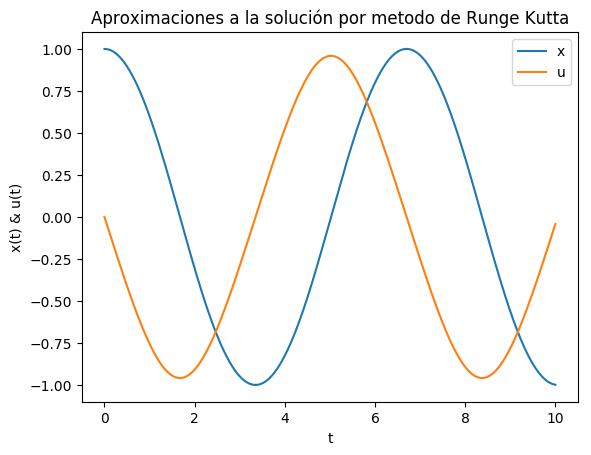

In [12]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución por metodo de Runge Kutta")
plot(list,wlistx1_kutta, label="x");
plot(list,wlistx2_kutta, label="u");
legend();

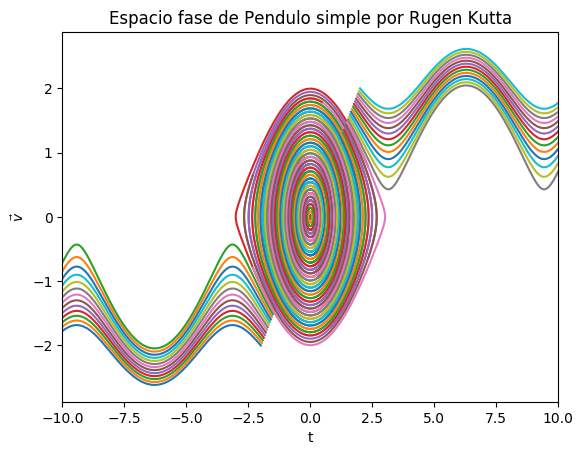

In [13]:
#Porque usar rand es chido

randoms1=linspace(-2,2,100)
lista1=1:0.01:10;

for i in 1:length(randoms1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(w,lista1,[randoms1[i],randoms1[i]]);
    wlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    wlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    
    xlabel("t")
    ylabel(L"\vec{v}")   
    title("Espacio fase de Pendulo simple por Rugen Kutta")
    plot(wlistx1_kutta,wlistx2_kutta);
    xlim(-10,10)
end;

#### El espacio de las fase del pendulo simple corresponde a una curva cerrada, es decir, el sistema vuelve al mismo estado después de realizar un ciclo completo, además su trayectoria en el espacio de las fases es simétrica respecto el eje velocidad, esto quiere decir que el movimiento del péndulo es el mismo en el sentido a las manecillas del reloj. Podemos notar otro tipo de movimiento, las curvas abiertas. Éstas se generan cuando el péndulo no da vueltas completas o cuando la energía total es mayor que el máximo valor de la energía potencial.

----

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [14]:
#La funcion dada:
function a(x,t)
    return x^2-1
    end;

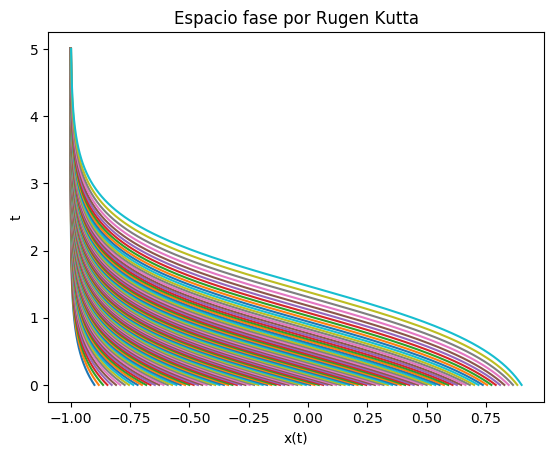

In [15]:
randoms3=linspace(-.9,.9,100)

for i in 1:length(randoms3)
    kutta=runge_kutta_4(a,randoms3[i],0,5,.01);
    xlabel("x(t)")
    ylabel("t")
    title("Espacio fase por Rugen Kutta")
    plot(kutta[2],kutta[1]);
end;

#### Aquí ya podemos ver que -1 es un punto atractor y 1 es repulsor.

---

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [16]:
#La funcion dada:
function b(x,t)
    return x^2
    end;

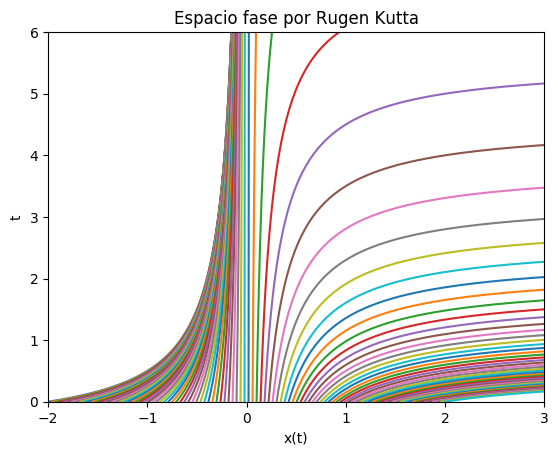

In [17]:
randoms4=linspace(-2,2,100)

for i in 1:length(randoms4)
    kutta=runge_kutta_4(b,randoms4[i],0,10,.01);
    xlabel("x(t)")
    ylabel("t")
    xlim(-2,3)
    ylim(0,6)
    title("Espacio fase por Rugen Kutta")
    plot(kutta[2],kutta[1]);
end;

#### Cero es el punto fijo unico y no es atractor ni repulsor sino un punto silla.

----

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

#### La funcion que debemos poner tiene la forma:
$$
m(x,t)=[ax[1]+bx[2],cx[1]+dx[2]]
$$

#### Preparence para una serie de copy-paste

* $a=c=1$, $b=d=0$

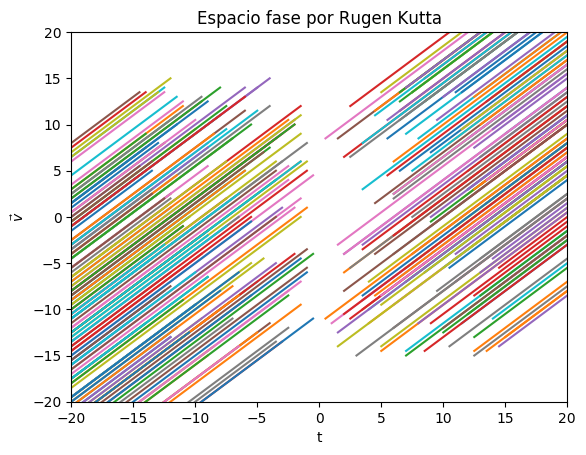

In [29]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[x[1],x[1]]

for i in 1:300
    ω = 0.5*rand(-30:30,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=c=-1$, $b=d=0$

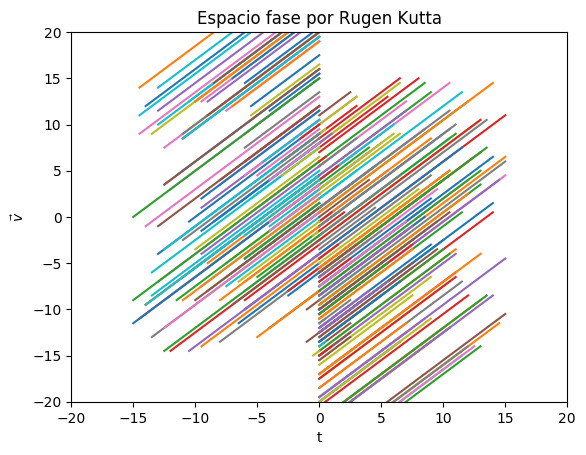

In [19]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[-x[1],-x[1]]

for i in 1:300
    ω = 0.5*rand(-30:30,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=1$, $b=-2$, $c=d=0$

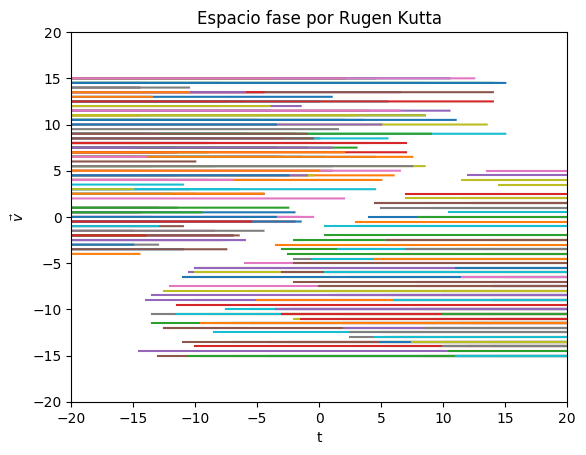

In [20]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[x[1]-2*x[2],0]

for i in 1:300
    ω = 0.5*rand(-30:30,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=1$, $b=-0.5$, $c=d=0$

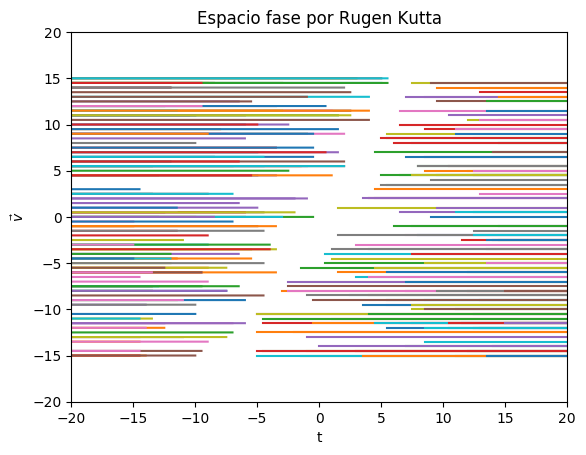

In [21]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[x[1]-0.5*x[2],0]

for i in 1:300
    ω = 0.5*rand(-30:30,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=d=0$, $b=-c=1$

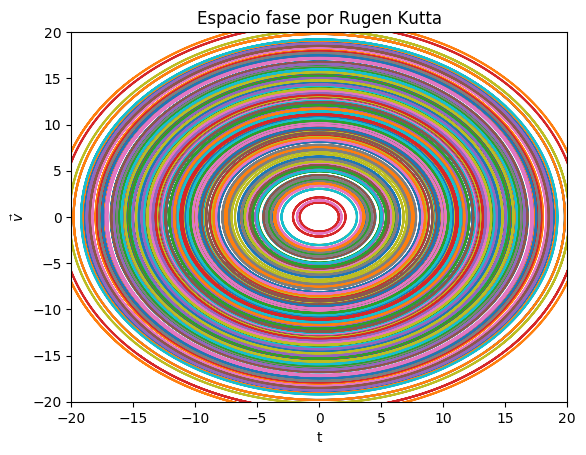

In [22]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[-x[2],x[1]]

for i in 1:300
    ω = 0.5*rand(-30:30,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=d=1$, $b=-c=1$

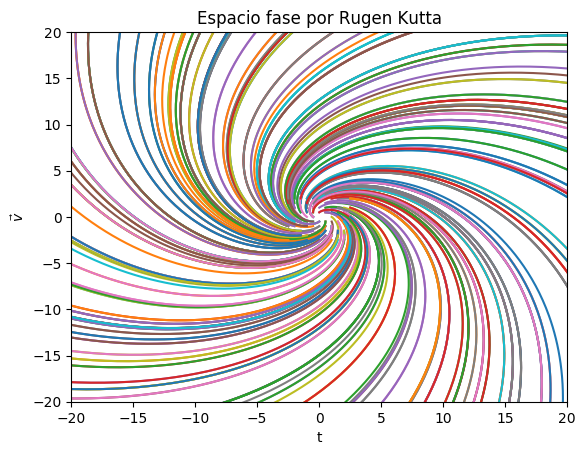

In [23]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[x[1]+x[2],-x[1]+x[2]]

for i in 1:300
    ω = 0.5*rand(-5:5,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=d=-1$, $b=-c=1$

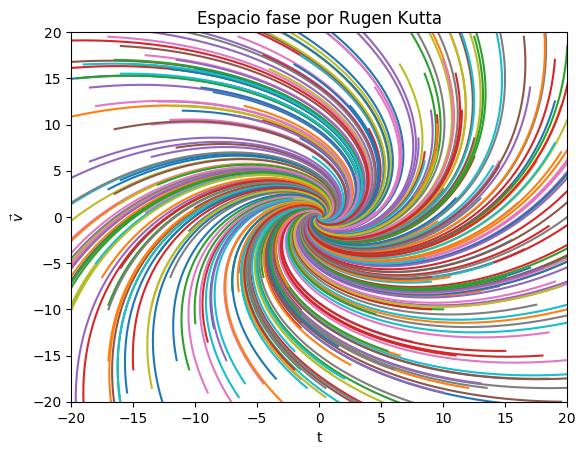

In [24]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[-x[1]+x[2],-x[1]-x[2]]

for i in 1:300
    ω = 0.5*rand(-50:50,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=d=-1$, $b=-c=-1$

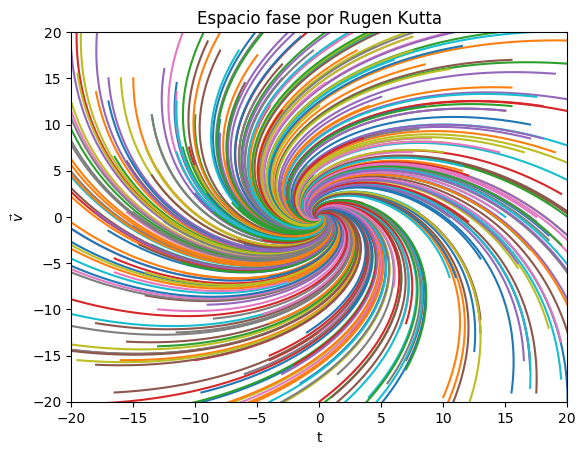

In [25]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[-x[1]-x[2],x[1]-x[2]]

for i in 1:300
    ω = 0.5*rand(-50:50,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=d=1$, $b=4,c=-2$

_En el notebook de clase aparece como:

* $a=b=1$, $b=4,c=-2$

_Como b se repite decidi tomar b=4 y d=1_

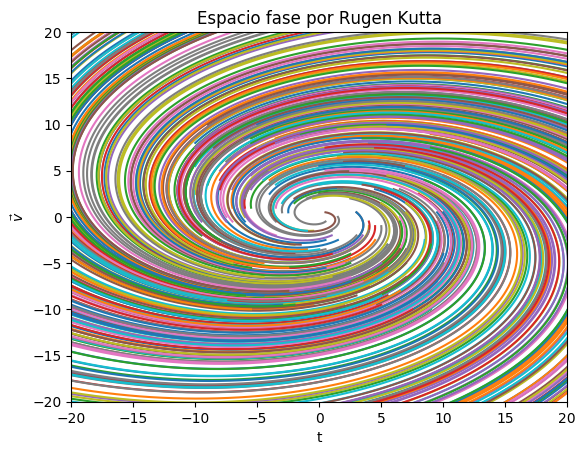

In [28]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[x[1]+4*x[2],-2*x[1]+x[2]]

for i in 1:300
    ω = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;

* $a=b=d=-1$, $c=0$

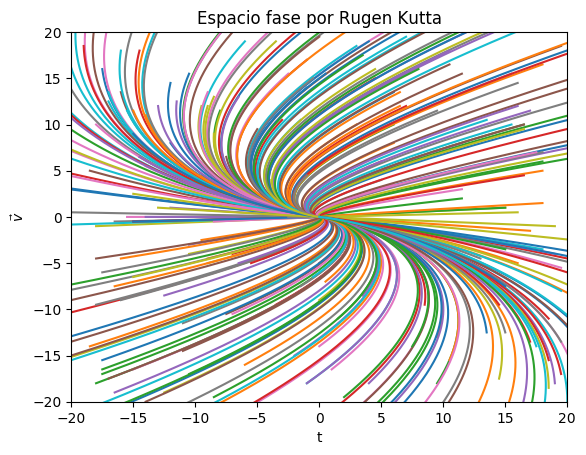

In [27]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
m(x,t)=[-x[1]-x[2],-x[2]]

for i in 1:300
    ω = 0.5*rand(-50:50,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(m,list,ω);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
    legend()
end;